In [2]:
from gaia_download import get_sources_by_random_index

In [6]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [3]:
sources = get_sources_by_random_index(start_index=1000)
sources.head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error
0,1846165132110522496,315.573464,28.821774,-0.035718,0.258022,-3.358419,0.230772,-3.638325,0.250024
1,4117766192454139136,262.669872,-21.802989,NaN,NaN,NaN,NaN,NaN,NaN
2,4064421015002065280,270.311275,-25.195034,NaN,NaN,NaN,NaN,NaN,NaN
3,2225828455686043264,346.270569,70.357978,0.155591,0.082792,-3.484440,0.091961,-0.821103,0.086819
4,5410015508420486144,143.434324,-48.747868,0.130303,0.036939,-3.811446,0.040957,3.690097,0.037938


In [4]:
sources_astrometry = sources[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]

In [5]:
sources_astrometry = sources_astrometry.dropna()

In [7]:
print(len(sources_astrometry))

815


In [8]:
af = DBSCAN(eps=4., min_samples=2).fit(sources_astrometry)

In [9]:
labels = af.labels_
print(len(set(labels)))

90


In [10]:
min(labels)

-1

In [11]:
sources_astrometry['label'] = labels

In [12]:
clustered_sources = sources_astrometry[sources_astrometry['label']!=-1]

In [13]:
import matplotlib.pyplot as plt

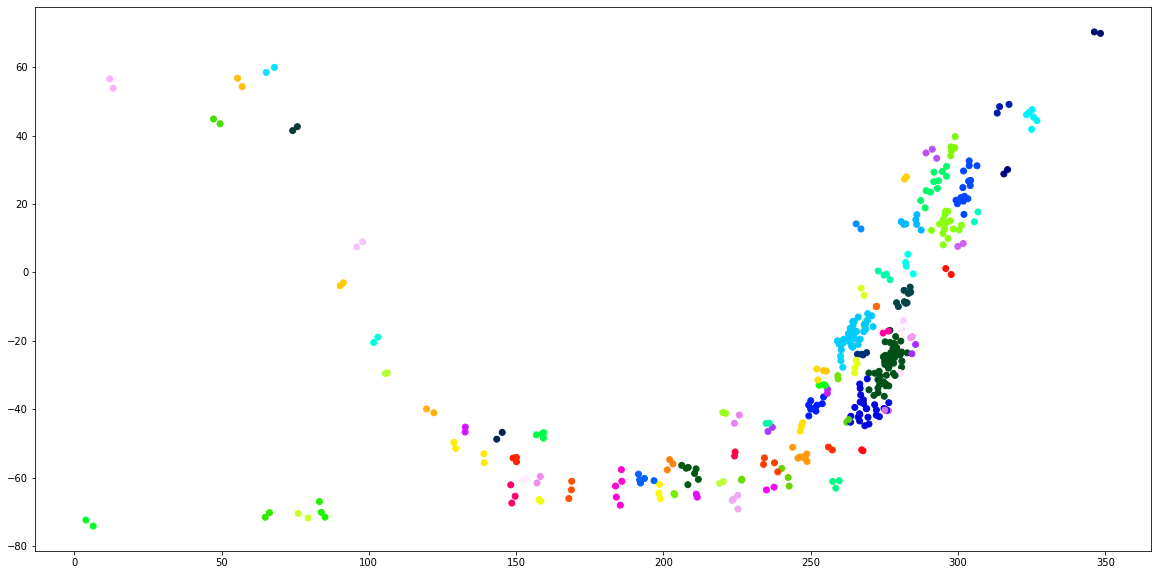

In [14]:
plt.figure(figsize=(20, 10))
plt.scatter(clustered_sources['ra'], clustered_sources['dec'], c=clustered_sources['label'], cmap='gist_ncar');

In [15]:
sources_astrometry[sources_astrometry['label']==18].head()

,ra,dec,parallax,pmra,pmdec,label
63,324.140074,46.816128,-2.206602,-3.238075,-3.932835,18
109,324.998528,41.869691,0.182142,-3.273434,-1.594645,18
194,326.809976,44.413165,1.004504,-2.184484,-3.281304,18
585,325.658753,45.428950,0.127814,-2.224064,-2.136333,18
713,325.170030,47.608325,0.008322,-5.999031,-2.613874,18
